# Learning Outcomes

1. Geometric transformation(rotation, translation, affine transformation, perspective transformation
2. Drawing functions
3. Bitwise operators (AND, OR, XOR, NOT)
4. Convolution (CNN, smoothing. sharpening)


## Setup

In [1]:
import cv2 as cv
# from scipy.spatial.distance import euclidean
# import math
import numpy as np
import matplotlib.pyplot as plt

def show_img(window_name, img, adjust=False):
    """3 arguments: window name, source images, boolean to adjust to screen size"""
    if adjust:
        cv.namedWindow(window_name, cv.WINDOW_NORMAL)
    else:
        cv.namedWindow(window_name)

    cv.imshow(window_name, img)
    cv.waitKey(0)
    cv.destroyAllWindows()
    

In [2]:
def plt_img(img, title=None):
    if len(img.shape)==3:
        plt.imshow(img)
    elif len(img.shape)==2:
        plt.imshow(img, cmap=plt.cm.gray)
    else:
        raise Exception('Incorrect image dimension')
        
    if title is not None:
        plt.title(title)
        
    plt.xticks([]), plt.yticks([])

In [3]:
!pip install scipy

In [4]:
import sys
assert sys.version_info >= (3, 7)
import matplotlib.pyplot as plt

import numpy as np
import cv2 as cv
from util_func import *

## Geometric Transformation

### Affine Transformation

#### Translation

In [5]:
img = cv.imread("images/lena.jfif")

h, w = img.shape[:2]
tx = 50
ty = 100
M = np.float32([[1, 0, tx], [0, 1, ty]])

# perform transformation
dst = cv.warpAffine(img, M, (w + tx, h + ty))

show_img("translation", dst)

#### Rotation

In [6]:
yc, xc = h // 2, w // 2
angle = -45
# rotate counterclockwise if postive
# rotate clockwise if negation


# get transformation matrix
M = cv.getRotationMatrix2D((xc, yc), angle, 1)

dst = cv.warpAffine(img, M, (w, h))
## change the dst dimension to ensure the img showed all in a window

show_img("rotation", dst)

### Custom Affine Transformation

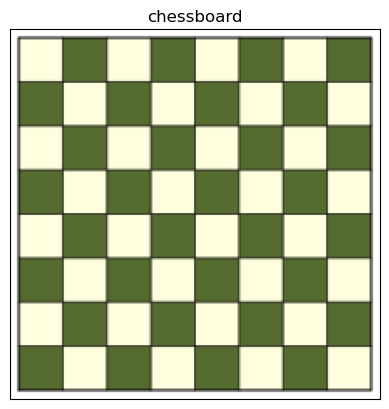

In [7]:
img = cv.imread("images/chessboard.png")

img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

plt_img(img, title = ("chessboard"))

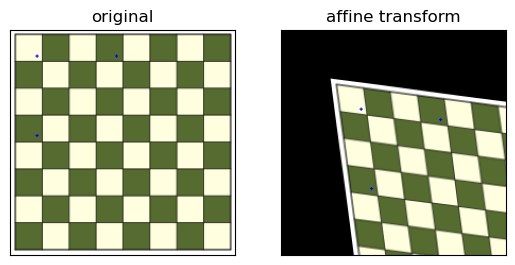

In [8]:
img_copy = img.copy()

h, w = img_copy.shape[:2]

# pairs of points
p0 = np.float32([[25, 25], [100, 25], [25, 100]])
p1 = np.float32([[75, 75], [150, 85], [85, 150]])

for pt in p0:
    cv.circle(img, (int(pt[0]), int(pt[1])), 1, (0, 0, 255), -1)

# get M
M = cv.getAffineTransform(p0, p1)
# perform transformation
dst = cv.warpAffine(img_copy, M, (w, h))

for pt in p1:
    cv.circle(dst, (int(pt[0]), int(pt[1])), 1, (0, 0, 255), -1)
    
    
plt.subplot(121), plt_img(img, title="original")
plt.subplot(122), plt_img(dst, title="affine transform")
plt.show()

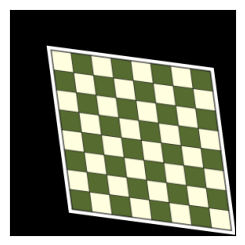

In [9]:
dst = cv.warpAffine(img_copy, M, (w+75, h+75))

plt.subplot(122), plt_img(dst)
plt.show()

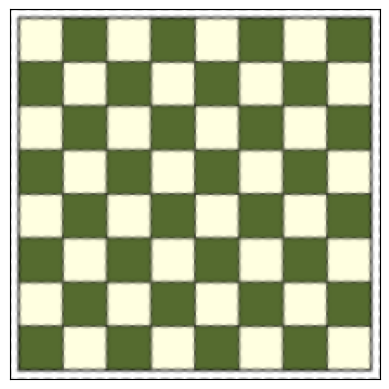

In [10]:
## inverse matrix
M_inv = cv.getAffineTransform(p1, p0)
img_restored = cv.warpAffine(dst, M_inv, (w, h))

plt_img(img_restored)
plt.show()

In [11]:
img = cv.imread("images/dice.jfif")

show_img("name card", img)

In [12]:
p = []

# mouse callback function
def mouse(event, x, y, flags, params):
    if event == cv.EVENT_LBUTTONDOWN:
        print((x, y))
        p.append((x, y))
        cv.circle(img, (x, y), 2, (0, 0, 255), -1)
        cv.imshow("img", img)
        
cv.imshow("img", img)
cv.setMouseCallback("img", mouse)
cv.waitKey(0)
cv.destroyAllWindows()

## start from left to the down

In [13]:
from scipy.spatial.distance import euclidean

In [14]:
w1 = euclidean(p[0], p[1])
w2 = euclidean(p[2], p[3])

h1 = euclidean(p[0], p[3])
h2 = euclidean(p[1], p[2])

W = max(w1, w2)
H = max(h1, h2)

p_array = np.float32(p)
dst = np.float32([[0, 0], [W-1, 0], [W-1, H-1], [0, H-1]])

M = cv.getPerspectiveTransform(p_array, dst)
warp = cv.warpPerspective(img, M, (int(W), int(H)))

cv.namedWindow("img", cv.WINDOW_NORMAL)
cv.imshow("img", img)
show_img("warp", warp, adjust = True)

IndexError: list index out of range

## Drawing Functions
- Line
- Circle
- Eclipse
- Rectangle
- Text

In [15]:
img = cv.imread("images/dog.jfif")
print(img.shape)
#cv.line(img, )

(168, 300, 3)


In [16]:
img_copy = img.copy()
cv.line(img_copy, (50, 50), (150, 100), (0, 0, 255), 2, cv.LINE_AA)
show_img("img", img_copy)

### Circle

In [17]:
img_copy = img.copy()
cv.circle(img_copy, (145, 50), 40, (0, 100, 200), 2, cv.LINE_8)
show_img("img", img_copy)

### Eclipse

In [18]:
img_copy = img.copy()
center = (145, 50)
axes = (50, 25)
#axes = (25, 50)
angle = 90
#angle = 0

cv.ellipse(img_copy,center, axes, angle, 0, 360, (100, 0, 50), 2, cv.LINE_4)
#ending point can change to 180, then ellipse become half
show_img("img", img_copy)

### Rectangle

In [19]:
img_copy = img.copy()
cv.rectangle(img_copy, (100, 10), (190, 90), (0, 100, 200), 2, cv.LINE_8)
show_img("img", img_copy)

### Text

In [20]:
img_copy = img.copy()
cv.putText(img_copy, "This dog is adorable!", (20, 145), cv.FONT_HERSHEY_SIMPLEX, 0.6, (0, 0, 100), 2)
show_img("img", img_copy)

## Exercise: Drawing Functions

Draw a bulleye image

In [21]:
white = np.ones((300,300)) + 255
white = np.uint8(white)

#cv.circle(white, (150, 150), 10, (255, 255, 255), 2, cv.LINE_8)
#cv.circle(white, (150, 150), 20, (255, 255, 255), 2, cv.LINE_8)
#cv.circle(white, (150, 150), 30, (255, 255, 255), 2, cv.LINE_8)
#cv.circle(white, (150, 150), 40, (255, 255, 255), 2, cv.LINE_8)
#cv.circle(white, (150, 150), 50, (255, 255, 255), 2, cv.LINE_8)
#cv.circle(white, (150, 150), 60, (255, 255, 255), 2, cv.LINE_8)
#cv.circle(white, (150, 150), 70, (255, 255, 255), 2, cv.LINE_8)
#cv.circle(white, (150, 150), 80, (255, 255, 255), 2, cv.LINE_8)
#cv.circle(white, (150, 150), 90, (255, 255, 255), 2, cv.LINE_8)
#cv.circle(white, (150, 150), 100, (255, 255, 255), 2, cv.LINE_8)
#cv.circle(white, (150, 150), 110, (255, 255, 255), 2, cv.LINE_8)

for i in range(10, 110, 10):
    cv.circle(white, (150, 150), i, (255, 255, 255), 2, cv.LINE_8)
    
    


show_img("bulleye", white)

In [22]:
# create bulleye
img = np.zeros((400, 400), dtype = np.uint8)

radius = np.arange(20, 200, 15)
yc, xc = img.shape[0] // 2, img.shape[1] // 2

for r in radius:
    cv.circle(img, (xc, yc), r, 255, 2)
    
# put text
cv.putText(img, "Bulleye", (50, 385), cv.FONT_HERSHEY_SIMPLEX, 0.7, 255)

show_img("img", img)

### Create a Simple App

In [ ]:
# trackbar

WHITE = (255, 255, 255)
RED = (0, 0, 255)
BLUE = (255, 0, 0)
GREEN = (0, 255, 0)

CYAN = (255, 255, 0)
MAGENTA = (255, 0, 255)
YELLOW = (0, 255, 255)

colors = (RED, BLUE, GREEN, CYAN, MAGENTA, YELLOW, WHITE)

# trackbar function, mousecallback function, while loop
def nothing(x):
    pass

p0 = p1 = (0, 0)
def mouse(event, x, y, flags, params):
    global p0, p1
    if event == cv.EVENT_LBUTTONDOWN:
        p0 = (x, y)
        
    elif event == cv.EVENT_LBUTTONUP:
        p1 = (x, y)
     
        d = cv.getTrackbarPos("thickness", 'window')
        if d == 0:
            d = -1
        i = cv.getTrackbarPos('color', 'window')
        color = colors[i]
        cv.rectangle(img, p0, p1, color, d)
        cv.imshow('window', img)
        
img = np.zeros((400, 400, 3), np.uint8)
cv.namedWindow('window')
cv.createTrackbar("color", 'window', 0, 6, nothing)
cv.createTrackbar("thickness", 'window', 0, 10, nothing)
cv.setMouseCallback('window', mouse)

while (1):
    cv.imshow("window", img)
    k = cv.waitKey(1) & 0xFF
    if k == 27:
        break
        
    if k == ord('c'):
        img[:] = 0
        
cv.destroyAllWindows()

### Bitwise Operations
- AND, OR, XOR and NOT

In [23]:
rect = np.zeros((400, 400), np.uint8)

rect[30:370, 30:370] = 255

circle = np.zeros((400, 400), np.uint8)
cv.circle(circle, (200, 200), 200, 255, -1)

cv.imshow("rectangle", rect)
show_img("circle", circle)

In [24]:
# AND
res = cv.bitwise_and(rect, circle)
show_img("AND", res)

In [25]:
# OR
res = cv.bitwise_or(rect, circle)
show_img("OR", res)

In [26]:
# XOR
res = cv.bitwise_xor(rect, circle)
show_img("XOR", res)

In [27]:
# NOT
res = cv.bitwise_not(rect, circle)
show_img("NOT", res)

### The bitwise operation are especially important for masking

In [28]:
img = cv.imread("images/dog.jfif")
h, w = img.shape[:2]

mask = np.zeros((h,w), dtype = np.uint8)
cv.circle(mask, (145, 50), 40, 255, -1)

face = cv.bitwise_and(img, img, mask = mask)


## mask can only be 2D

show_img("face", face)

### Identity Kernel
- 0 0 0
- 0 1 0
- 0 0 0

In [29]:
kernel = np.zeros((3, 3))
kernel[1, 1] = 1

img = cv.imread("images/opencv_logo.png")
# -1 means dst should be the same datatype with the input source 
dst = cv.filter2D(img, -1, kernel)

cv.imshow("original", img)
show_img("identity", dst)

### Use Case
- Sharpening 
- Smoothing (a way to denoise)
- cool effect

In [30]:
# sharpening
kernel = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])

img = cv.imread("images/dog.jfif")
dst = cv.filter2D(img, -1, kernel)

cv.imshow("original", img)
show_img("sharpening", dst)

# normally don't use in pipeline, cause it might increase the noise

In [31]:
# sharpen = img + (img - blur) * amount
# amount = 0.5 (changeable)
kernel = np.ones((3, 3)) / 9

print(kernel)

[[0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]]


In [32]:
dst = cv.filter2D(img, -1, kernel)

cv.imshow("orginal", img)
show_img("blur", dst)

In [33]:
sharp = cv.addWeighted(img, 1.5, dst, -0.5, 0)

show_img("sharp", sharp)

## OpenCV Image Blurring Functions
- 'cv.blur': smoothing (average filter) ---- same as above, can direct use this
- 'cv.GaussianBlur()': Gaussian smoothing. Blur effect of Gaussian blurring is more satisfactory
- 'cv.medianBlur()': median filter (Good for removing salt and pepper noise)
- 'cv.bilateralfilter()': ede-preserving filter (the most computational intensive) 

Types of noise: random noise, Gaussian noise, salt and pepper noise (if look at grayscale, some pixels suddenly become white or black, 0 or 255).

## Exercise

In [34]:
!pip install imutills

ERROR: Could not find a version that satisfies the requirement imutills (from versions: none)
ERROR: No matching distribution found for imutills


In [35]:
from imutils import rotate_bound

ModuleNotFoundError: No module named 'imutils'

In [36]:
# Question 1
img = cv.imread("images/flower.jfif")

h, w = img.shape[:2]
center = (w // 2, h // 2)
angle = 45 # +ve is anticlockwise

rotation_matrix = cv.getRotationMatrix2D(center, angle, 1.0)

cos_theta = np.abs(rotation_matrix[0, 0])
sin_theta = np.abs(rotation_matrix[0, 1])
    
new_w = int((h * sin_theta) + (w * cos_theta))
new_h = int((h * cos_theta) + (w * sin_theta))

rotation_matrix[0, 2] += (new_w / 2) - center[0]
rotation_matrix[1, 2] += (new_h / 2) - center[1]
    
dst = cv.warpAffine(img, rotation_matrix, (new_w, new_h))

show_img("rotation", dst)

In [ ]:
# Question 2


In [ ]:
# Question 3


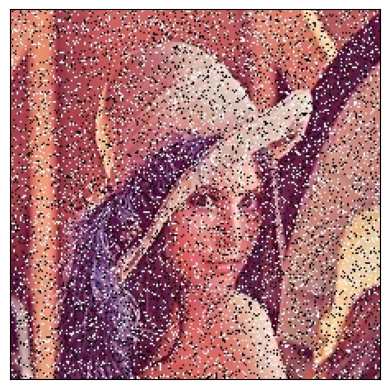

In [37]:
# Question 4
img = cv.imread("images/noise_lena.jpg")

plt_img(cv.cvtColor(img, cv.COLOR_BGR2RGB))

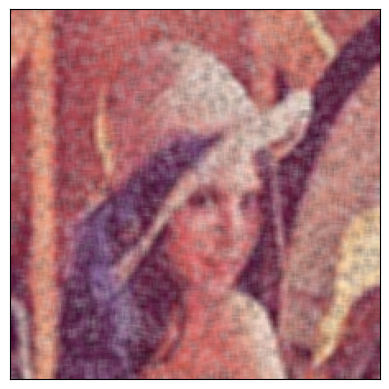

In [39]:
# blur, average filter
kernel = np.ones((5,5)) / 25
blur = cv.filter2D(img, -1, kernel)
plt_img(cv.cvtColor(blur, cv.COLOR_BGR2RGB))

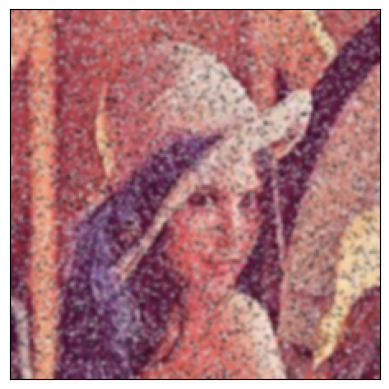

In [40]:
# Gaussian Blurring
blur = cv.GaussianBlur(img, (5,5), 0)
plt_img(cv.cvtColor(blur, cv.COLOR_BGR2RGB))

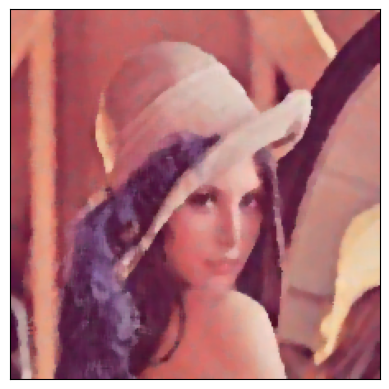

In [41]:
# Median Blurring
median = cv.medianBlur(img,5)
plt_img(cv.cvtColor(median, cv.COLOR_BGR2RGB))